In [ ]:
import csv
import obspy
import matplotlib.pyplot as plt
from obspy import UTCDateTime
from obspy.clients.iris import Client

In [13]:
client = Client()

# define catalog duration
year1 = 2021
year2 = 2022

# define stations provider
provider = "IRIS" 

catalog = f"./events_{year1}-{year2}.csv"
with open(catalog, "r") as csvfile:
    events = csv.reader(csvfile, delimiter=',')
    next(events, None)  # skip the headers
    for i,event in enumerate(events):
        if (i == 4):  ### only check nth event's waveforms
            origin_time = UTCDateTime(event[0])
            year = event[0][0:4]
            event_fname = "".join(event[0].split("T")[0].split("-")) + "".join("".join("".join(event[0].split("T")[1].split("Z")).split(".")).split(":"))
            lon = event[2]
            lat = event[1]
            print(origin_time,lon,lat)
            break

datadir = f"./Download/{provider}/miniseed/{year1}/{event_fname}"

# read in all vertical-component mseed files for one event
st = obspy.read(f"{datadir}/*Z.mseed")


2021-12-30T13:13:17.562000Z  125.24980  -0.07980


<Figure size 1152x216 with 0 Axes>

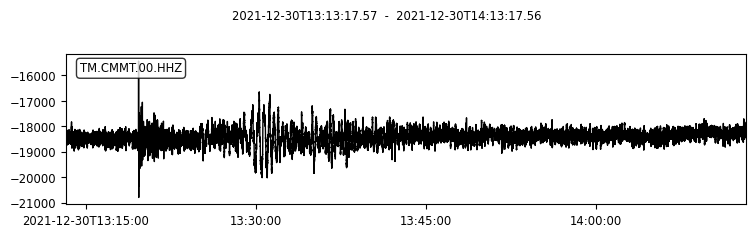

In [16]:
num = 8  ### view nth waveform
fig = plt.figure(figsize=(16, 3))
st[num].plot() 
plt.show()

In [17]:
station = f"./stations_{provider}_{year1}-{year2}.txt"
for sst in st:
    netwk = sst.stats.network
    stanm = sst.stats.station
    print(netwk,stanm)
    with open(station, "r") as stafiles:
        stafiles.readline()
        for i,file in enumerate(stafiles):
            sta = file.split("|")
            if netwk in sta and stanm in sta:
                stlo = sta[5]
                stla = sta[4]
                distaz = client.distaz(stla, stlo, lat, lon)
                distinm = distaz['distance'] * 111.19 * 1000
                sst.stats.distance = distinm
                print(distaz['distance'],distinm)
                break

CB TNC
36.04388 4007719.0172
IC KMI
33.28975 3701487.3024999998
MM KTA
37.08313 4123273.2246999997
MM KTN
32.94675 3663349.1325
MM NGU
36.51399 4059990.5481000002
MM TGI
34.60665 3847913.4135
RM SLV
29.87443 3321737.8717
TM CMAI
32.57178 3621656.2182
TM CMMT
32.02987 3561401.2453
TM CRAI
31.72653 3527672.8707
TM LOEI
29.18261 3244814.4059
TM MHIT
33.0826 3678454.2939999998
TM PBKT
29.19498 3246189.8262
TM PHRA
30.83848 3428930.5912


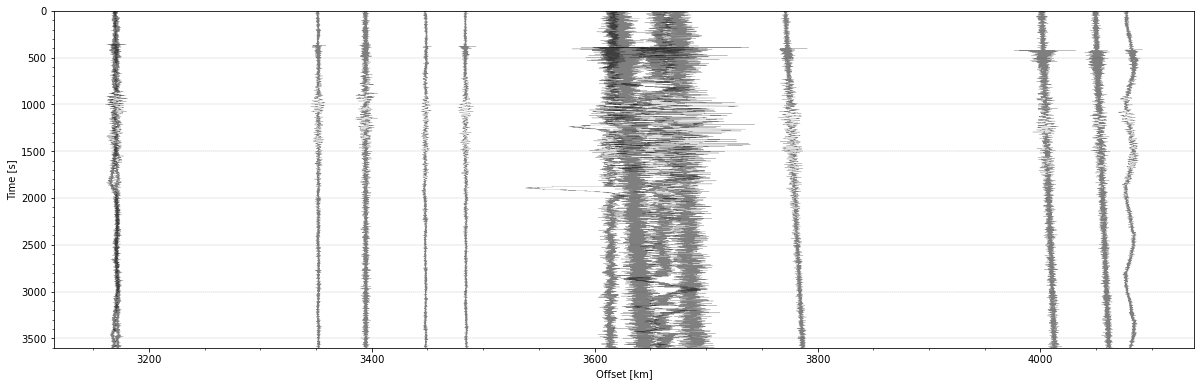

In [18]:
fig = plt.figure(figsize=(18, 6))
st.plot(type='section', recordlength=3600, time_down=True, linewidth=.25, grid_linewidth=.25, show=False, fig=fig,
    scale=2.0)
plt.show()